# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:20<00:00, 2.94KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

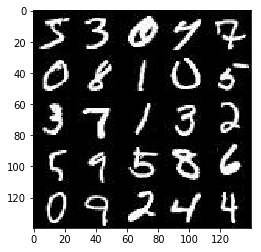

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

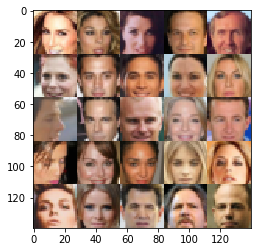

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'real_inputs') 
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='z_inputs') 
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
         
    # Input layer is 28x28x dim (1 or 3)
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.02))
        relu1 = tf.maximum(0.2 * x1, x1)
        # 14x14x64
    
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.02))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.02))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1,kernel_initializer =tf.random_normal_initializer(stddev=0.02))
        out = tf.sigmoid(logits)

    return out, logits 

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not(is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*128)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 128))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
        # 7x7x128 now
        
        x2 = tf.layers.conv2d_transpose(x1, 64, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        # 7x7x64 now
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
        # 14x14x32 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=2, padding='same')
        # 28x 28 x 3 (1) now
        
        out = tf.tanh(logits)
        
  
    return out 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [16]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim,is_train=True)
    d_model_real, d_logits_real = discriminator(input_real,reuse = False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [17]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [21]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images*2
                batch_z = np.random.uniform(-1.0, 1.0, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate:learning_rate})
                
                if steps % 10 == 0:

                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.1990... Generator Loss: 2.0335
Epoch 1/2... Discriminator Loss: 1.5877... Generator Loss: 19.0447
Epoch 1/2... Discriminator Loss: 1.9203... Generator Loss: 9.0161
Epoch 1/2... Discriminator Loss: 3.7343... Generator Loss: 0.0364
Epoch 1/2... Discriminator Loss: 2.2035... Generator Loss: 4.3875
Epoch 1/2... Discriminator Loss: 0.6776... Generator Loss: 1.6222
Epoch 1/2... Discriminator Loss: 1.5744... Generator Loss: 0.2840
Epoch 1/2... Discriminator Loss: 0.6219... Generator Loss: 1.5904
Epoch 1/2... Discriminator Loss: 0.5682... Generator Loss: 1.5775
Epoch 1/2... Discriminator Loss: 1.7160... Generator Loss: 0.2914


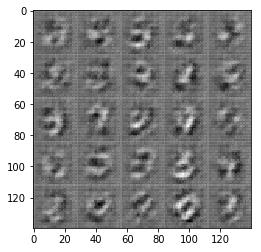

Epoch 1/2... Discriminator Loss: 2.7241... Generator Loss: 0.0863
Epoch 1/2... Discriminator Loss: 0.9177... Generator Loss: 0.6310
Epoch 1/2... Discriminator Loss: 0.5388... Generator Loss: 1.6621
Epoch 1/2... Discriminator Loss: 0.6004... Generator Loss: 1.4104
Epoch 1/2... Discriminator Loss: 1.4964... Generator Loss: 0.5428
Epoch 1/2... Discriminator Loss: 1.4294... Generator Loss: 0.3518
Epoch 1/2... Discriminator Loss: 2.0632... Generator Loss: 0.1582
Epoch 1/2... Discriminator Loss: 0.5792... Generator Loss: 2.1244
Epoch 1/2... Discriminator Loss: 1.0230... Generator Loss: 0.6496
Epoch 1/2... Discriminator Loss: 0.8550... Generator Loss: 1.9289


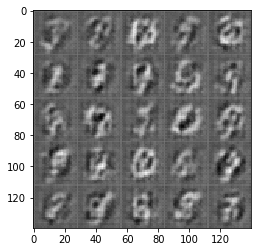

Epoch 1/2... Discriminator Loss: 1.1416... Generator Loss: 2.2912
Epoch 1/2... Discriminator Loss: 1.2617... Generator Loss: 0.5043
Epoch 1/2... Discriminator Loss: 1.4217... Generator Loss: 0.3429
Epoch 1/2... Discriminator Loss: 1.0729... Generator Loss: 0.5667
Epoch 1/2... Discriminator Loss: 0.8235... Generator Loss: 0.8307
Epoch 1/2... Discriminator Loss: 0.8126... Generator Loss: 0.9727
Epoch 1/2... Discriminator Loss: 0.8083... Generator Loss: 1.2722
Epoch 1/2... Discriminator Loss: 1.3139... Generator Loss: 0.3870
Epoch 1/2... Discriminator Loss: 0.9960... Generator Loss: 0.7438
Epoch 1/2... Discriminator Loss: 1.0516... Generator Loss: 1.4455


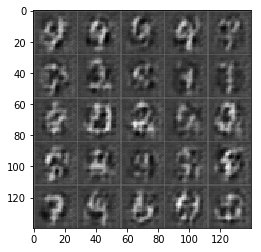

Epoch 1/2... Discriminator Loss: 1.5819... Generator Loss: 0.2891
Epoch 1/2... Discriminator Loss: 1.1430... Generator Loss: 1.7475
Epoch 1/2... Discriminator Loss: 1.1927... Generator Loss: 0.4686
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 0.3917
Epoch 1/2... Discriminator Loss: 1.3675... Generator Loss: 0.3720
Epoch 1/2... Discriminator Loss: 0.6525... Generator Loss: 1.1031
Epoch 1/2... Discriminator Loss: 1.2862... Generator Loss: 0.4133
Epoch 1/2... Discriminator Loss: 0.8777... Generator Loss: 1.6227
Epoch 1/2... Discriminator Loss: 0.9177... Generator Loss: 0.8700
Epoch 1/2... Discriminator Loss: 1.5650... Generator Loss: 0.3260


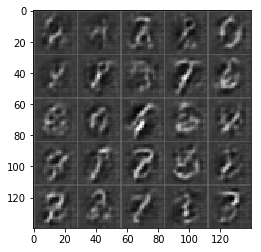

Epoch 1/2... Discriminator Loss: 0.8115... Generator Loss: 0.9018
Epoch 1/2... Discriminator Loss: 1.2232... Generator Loss: 0.6511
Epoch 1/2... Discriminator Loss: 1.2021... Generator Loss: 0.4846
Epoch 1/2... Discriminator Loss: 1.0598... Generator Loss: 0.9137
Epoch 1/2... Discriminator Loss: 1.0255... Generator Loss: 0.8332
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 0.4265
Epoch 1/2... Discriminator Loss: 1.3780... Generator Loss: 0.3921
Epoch 1/2... Discriminator Loss: 1.1800... Generator Loss: 0.6281
Epoch 1/2... Discriminator Loss: 1.1807... Generator Loss: 0.7577
Epoch 1/2... Discriminator Loss: 1.0737... Generator Loss: 1.4587


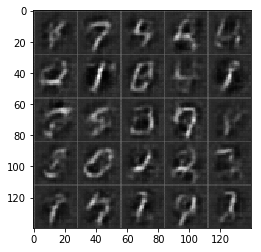

Epoch 1/2... Discriminator Loss: 1.3379... Generator Loss: 0.5187
Epoch 1/2... Discriminator Loss: 1.2618... Generator Loss: 0.6576
Epoch 1/2... Discriminator Loss: 1.1724... Generator Loss: 0.5390
Epoch 1/2... Discriminator Loss: 1.1008... Generator Loss: 1.1697
Epoch 1/2... Discriminator Loss: 1.5371... Generator Loss: 0.3257
Epoch 1/2... Discriminator Loss: 1.2676... Generator Loss: 0.6587
Epoch 1/2... Discriminator Loss: 1.5086... Generator Loss: 0.4275
Epoch 1/2... Discriminator Loss: 1.3352... Generator Loss: 0.4820
Epoch 1/2... Discriminator Loss: 1.2267... Generator Loss: 1.0230
Epoch 1/2... Discriminator Loss: 1.7455... Generator Loss: 0.2610


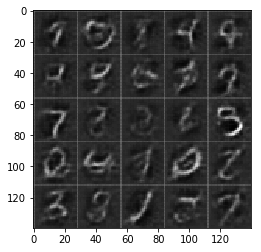

Epoch 1/2... Discriminator Loss: 1.7951... Generator Loss: 0.2300
Epoch 1/2... Discriminator Loss: 1.2443... Generator Loss: 0.5754
Epoch 1/2... Discriminator Loss: 2.0187... Generator Loss: 0.1946
Epoch 1/2... Discriminator Loss: 1.0774... Generator Loss: 1.0500
Epoch 1/2... Discriminator Loss: 1.3006... Generator Loss: 0.4525
Epoch 1/2... Discriminator Loss: 1.3209... Generator Loss: 0.9788
Epoch 1/2... Discriminator Loss: 1.1781... Generator Loss: 0.7595
Epoch 1/2... Discriminator Loss: 1.2590... Generator Loss: 0.8765
Epoch 1/2... Discriminator Loss: 1.2289... Generator Loss: 0.4898
Epoch 1/2... Discriminator Loss: 1.1415... Generator Loss: 1.0061


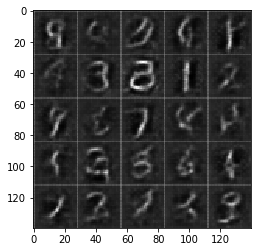

Epoch 1/2... Discriminator Loss: 1.8169... Generator Loss: 0.2411
Epoch 1/2... Discriminator Loss: 1.4462... Generator Loss: 0.3750
Epoch 1/2... Discriminator Loss: 1.2295... Generator Loss: 0.8657
Epoch 1/2... Discriminator Loss: 1.5856... Generator Loss: 1.2954
Epoch 1/2... Discriminator Loss: 1.2360... Generator Loss: 0.6038
Epoch 1/2... Discriminator Loss: 1.1574... Generator Loss: 0.5623
Epoch 1/2... Discriminator Loss: 1.2979... Generator Loss: 1.6152
Epoch 1/2... Discriminator Loss: 1.1769... Generator Loss: 0.7658
Epoch 1/2... Discriminator Loss: 1.2647... Generator Loss: 0.8767
Epoch 1/2... Discriminator Loss: 1.3060... Generator Loss: 0.5534


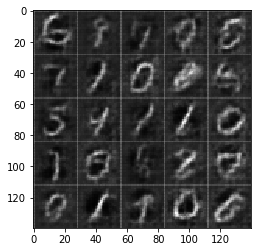

Epoch 1/2... Discriminator Loss: 1.6225... Generator Loss: 0.3196
Epoch 1/2... Discriminator Loss: 1.2592... Generator Loss: 0.5277
Epoch 1/2... Discriminator Loss: 1.3557... Generator Loss: 0.4370
Epoch 1/2... Discriminator Loss: 0.9673... Generator Loss: 0.7828
Epoch 1/2... Discriminator Loss: 1.0905... Generator Loss: 0.9512
Epoch 1/2... Discriminator Loss: 1.6620... Generator Loss: 0.4448
Epoch 1/2... Discriminator Loss: 1.4772... Generator Loss: 0.3791
Epoch 1/2... Discriminator Loss: 1.0063... Generator Loss: 0.9604
Epoch 1/2... Discriminator Loss: 1.1913... Generator Loss: 0.6512
Epoch 1/2... Discriminator Loss: 1.1882... Generator Loss: 1.0916


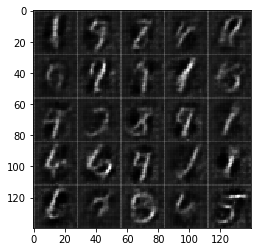

Epoch 1/2... Discriminator Loss: 1.4974... Generator Loss: 0.3691
Epoch 1/2... Discriminator Loss: 1.0150... Generator Loss: 0.7659
Epoch 1/2... Discriminator Loss: 1.3660... Generator Loss: 0.4095
Epoch 2/2... Discriminator Loss: 3.6126... Generator Loss: 3.9430
Epoch 2/2... Discriminator Loss: 1.4441... Generator Loss: 0.5899
Epoch 2/2... Discriminator Loss: 1.4027... Generator Loss: 0.5389
Epoch 2/2... Discriminator Loss: 1.2025... Generator Loss: 0.9341
Epoch 2/2... Discriminator Loss: 1.3754... Generator Loss: 0.5394
Epoch 2/2... Discriminator Loss: 1.9017... Generator Loss: 0.2314
Epoch 2/2... Discriminator Loss: 1.2412... Generator Loss: 0.7063
Epoch 2/2... Discriminator Loss: 1.4375... Generator Loss: 0.3925
Epoch 2/2... Discriminator Loss: 1.0790... Generator Loss: 0.6727
Epoch 2/2... Discriminator Loss: 1.3074... Generator Loss: 0.4501


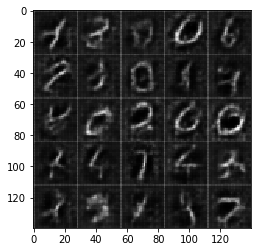

Epoch 2/2... Discriminator Loss: 1.3912... Generator Loss: 0.3670
Epoch 2/2... Discriminator Loss: 1.0543... Generator Loss: 0.5946
Epoch 2/2... Discriminator Loss: 1.3999... Generator Loss: 0.4084
Epoch 2/2... Discriminator Loss: 1.4311... Generator Loss: 1.3522
Epoch 2/2... Discriminator Loss: 1.4652... Generator Loss: 0.4290
Epoch 2/2... Discriminator Loss: 1.3754... Generator Loss: 0.3723
Epoch 2/2... Discriminator Loss: 1.1781... Generator Loss: 0.7302
Epoch 2/2... Discriminator Loss: 1.3912... Generator Loss: 0.4304
Epoch 2/2... Discriminator Loss: 1.4543... Generator Loss: 0.3761
Epoch 2/2... Discriminator Loss: 1.7728... Generator Loss: 0.3425


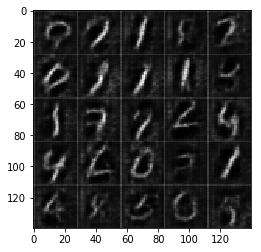

Epoch 2/2... Discriminator Loss: 1.1854... Generator Loss: 0.7898
Epoch 2/2... Discriminator Loss: 1.3247... Generator Loss: 0.4868
Epoch 2/2... Discriminator Loss: 1.3621... Generator Loss: 0.4716
Epoch 2/2... Discriminator Loss: 1.9053... Generator Loss: 0.2068
Epoch 2/2... Discriminator Loss: 1.4024... Generator Loss: 0.3774
Epoch 2/2... Discriminator Loss: 1.3335... Generator Loss: 0.6974
Epoch 2/2... Discriminator Loss: 1.0486... Generator Loss: 1.0700
Epoch 2/2... Discriminator Loss: 1.7073... Generator Loss: 0.3552
Epoch 2/2... Discriminator Loss: 1.7205... Generator Loss: 0.2540
Epoch 2/2... Discriminator Loss: 1.4409... Generator Loss: 0.4270


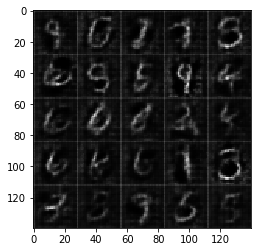

Epoch 2/2... Discriminator Loss: 1.2847... Generator Loss: 0.4609
Epoch 2/2... Discriminator Loss: 1.5684... Generator Loss: 0.3517
Epoch 2/2... Discriminator Loss: 1.3102... Generator Loss: 0.5891
Epoch 2/2... Discriminator Loss: 1.2599... Generator Loss: 0.6305
Epoch 2/2... Discriminator Loss: 1.0515... Generator Loss: 1.0550
Epoch 2/2... Discriminator Loss: 1.2750... Generator Loss: 0.5707
Epoch 2/2... Discriminator Loss: 1.2994... Generator Loss: 0.4368
Epoch 2/2... Discriminator Loss: 2.3757... Generator Loss: 2.9177
Epoch 2/2... Discriminator Loss: 1.9690... Generator Loss: 0.1975
Epoch 2/2... Discriminator Loss: 1.1947... Generator Loss: 0.5673


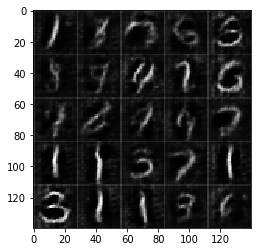

Epoch 2/2... Discriminator Loss: 1.2018... Generator Loss: 0.5366
Epoch 2/2... Discriminator Loss: 1.1485... Generator Loss: 1.6066
Epoch 2/2... Discriminator Loss: 1.2299... Generator Loss: 0.5934
Epoch 2/2... Discriminator Loss: 1.4564... Generator Loss: 0.3802
Epoch 2/2... Discriminator Loss: 1.3255... Generator Loss: 2.2035
Epoch 2/2... Discriminator Loss: 1.0827... Generator Loss: 0.8994
Epoch 2/2... Discriminator Loss: 1.4945... Generator Loss: 0.3648
Epoch 2/2... Discriminator Loss: 1.5522... Generator Loss: 0.5043
Epoch 2/2... Discriminator Loss: 1.6053... Generator Loss: 0.3207
Epoch 2/2... Discriminator Loss: 1.5417... Generator Loss: 0.3475


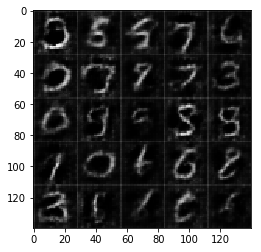

Epoch 2/2... Discriminator Loss: 1.7737... Generator Loss: 0.3152
Epoch 2/2... Discriminator Loss: 1.2313... Generator Loss: 0.5358
Epoch 2/2... Discriminator Loss: 1.6444... Generator Loss: 0.3377
Epoch 2/2... Discriminator Loss: 1.3894... Generator Loss: 0.4376
Epoch 2/2... Discriminator Loss: 1.1668... Generator Loss: 1.2209
Epoch 2/2... Discriminator Loss: 1.5022... Generator Loss: 0.3678
Epoch 2/2... Discriminator Loss: 1.6900... Generator Loss: 0.3199
Epoch 2/2... Discriminator Loss: 1.3368... Generator Loss: 0.5672
Epoch 2/2... Discriminator Loss: 1.1070... Generator Loss: 0.7741
Epoch 2/2... Discriminator Loss: 1.5494... Generator Loss: 0.3242


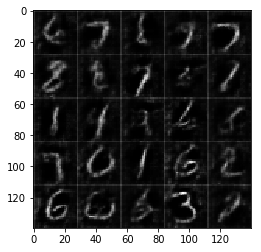

Epoch 2/2... Discriminator Loss: 1.8890... Generator Loss: 0.2361
Epoch 2/2... Discriminator Loss: 1.6507... Generator Loss: 0.3153
Epoch 2/2... Discriminator Loss: 1.3130... Generator Loss: 0.4788
Epoch 2/2... Discriminator Loss: 0.9519... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 1.5152... Generator Loss: 0.3858
Epoch 2/2... Discriminator Loss: 1.3177... Generator Loss: 0.5109
Epoch 2/2... Discriminator Loss: 1.8599... Generator Loss: 0.2361
Epoch 2/2... Discriminator Loss: 1.7086... Generator Loss: 0.3560
Epoch 2/2... Discriminator Loss: 1.2445... Generator Loss: 0.6313
Epoch 2/2... Discriminator Loss: 1.7535... Generator Loss: 0.2417


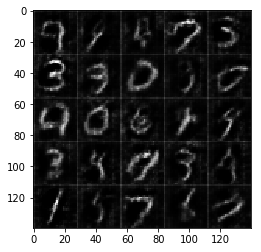

Epoch 2/2... Discriminator Loss: 1.0735... Generator Loss: 0.9096
Epoch 2/2... Discriminator Loss: 1.5238... Generator Loss: 0.3656
Epoch 2/2... Discriminator Loss: 1.2084... Generator Loss: 0.6738
Epoch 2/2... Discriminator Loss: 1.1257... Generator Loss: 0.6886
Epoch 2/2... Discriminator Loss: 1.4736... Generator Loss: 0.3824
Epoch 2/2... Discriminator Loss: 1.3259... Generator Loss: 0.5034
Epoch 2/2... Discriminator Loss: 1.7411... Generator Loss: 0.2904
Epoch 2/2... Discriminator Loss: 1.7076... Generator Loss: 0.3101
Epoch 2/2... Discriminator Loss: 1.5246... Generator Loss: 0.3677
Epoch 2/2... Discriminator Loss: 1.8998... Generator Loss: 0.2102


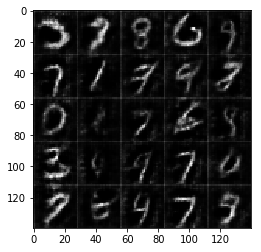

Epoch 2/2... Discriminator Loss: 1.0120... Generator Loss: 0.7560
Epoch 2/2... Discriminator Loss: 1.2763... Generator Loss: 0.4918
Epoch 2/2... Discriminator Loss: 1.7753... Generator Loss: 0.7184
Epoch 2/2... Discriminator Loss: 0.9769... Generator Loss: 0.6689
Epoch 2/2... Discriminator Loss: 1.1486... Generator Loss: 0.7669
Epoch 2/2... Discriminator Loss: 1.5908... Generator Loss: 0.5837
Epoch 2/2... Discriminator Loss: 1.9832... Generator Loss: 1.3943
Epoch 2/2... Discriminator Loss: 1.0807... Generator Loss: 0.7319
Epoch 2/2... Discriminator Loss: 1.0685... Generator Loss: 1.2412
Epoch 2/2... Discriminator Loss: 0.9458... Generator Loss: 0.7796


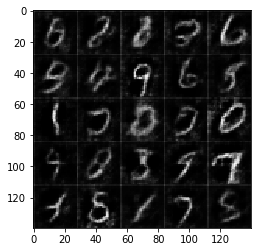

Epoch 2/2... Discriminator Loss: 1.2889... Generator Loss: 0.4737
Epoch 2/2... Discriminator Loss: 1.2829... Generator Loss: 0.5661
Epoch 2/2... Discriminator Loss: 1.7744... Generator Loss: 0.2360


In [22]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.4499... Generator Loss: 0.0211
Epoch 1/1... Discriminator Loss: 3.5028... Generator Loss: 0.0403
Epoch 1/1... Discriminator Loss: 1.8802... Generator Loss: 0.3814
Epoch 1/1... Discriminator Loss: 2.4972... Generator Loss: 0.1320
Epoch 1/1... Discriminator Loss: 1.5765... Generator Loss: 0.3828
Epoch 1/1... Discriminator Loss: 1.9474... Generator Loss: 1.9607
Epoch 1/1... Discriminator Loss: 1.4559... Generator Loss: 0.7248
Epoch 1/1... Discriminator Loss: 1.7554... Generator Loss: 0.4431
Epoch 1/1... Discriminator Loss: 1.8261... Generator Loss: 0.5850
Epoch 1/1... Discriminator Loss: 2.4316... Generator Loss: 0.1855


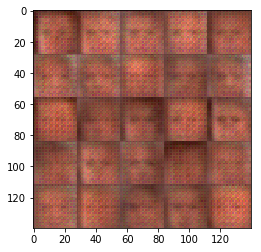

Epoch 1/1... Discriminator Loss: 1.6405... Generator Loss: 0.5613
Epoch 1/1... Discriminator Loss: 1.9117... Generator Loss: 0.2380
Epoch 1/1... Discriminator Loss: 1.4847... Generator Loss: 0.5129
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 1.3015
Epoch 1/1... Discriminator Loss: 1.5471... Generator Loss: 0.3945
Epoch 1/1... Discriminator Loss: 1.6316... Generator Loss: 0.4513
Epoch 1/1... Discriminator Loss: 1.2911... Generator Loss: 0.6527
Epoch 1/1... Discriminator Loss: 1.4800... Generator Loss: 0.8048
Epoch 1/1... Discriminator Loss: 1.7022... Generator Loss: 0.3094
Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.5746


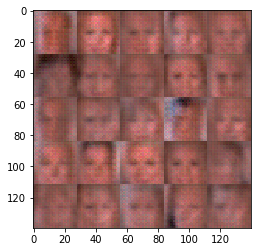

Epoch 1/1... Discriminator Loss: 1.8695... Generator Loss: 1.6202
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.9665
Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.5858... Generator Loss: 0.4217
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.5715
Epoch 1/1... Discriminator Loss: 1.3026... Generator Loss: 0.8605
Epoch 1/1... Discriminator Loss: 1.6339... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.9782
Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 0.8417


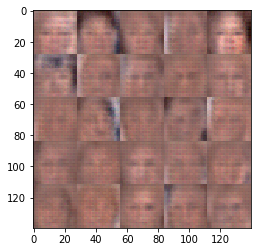

Epoch 1/1... Discriminator Loss: 1.4455... Generator Loss: 1.0037
Epoch 1/1... Discriminator Loss: 1.3428... Generator Loss: 0.5448
Epoch 1/1... Discriminator Loss: 1.7083... Generator Loss: 0.3905
Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.4719
Epoch 1/1... Discriminator Loss: 1.5647... Generator Loss: 1.4191
Epoch 1/1... Discriminator Loss: 1.4978... Generator Loss: 0.4944
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.7069
Epoch 1/1... Discriminator Loss: 1.4854... Generator Loss: 1.1835
Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.6274


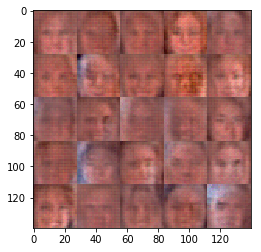

Epoch 1/1... Discriminator Loss: 1.4632... Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.5035... Generator Loss: 0.6872
Epoch 1/1... Discriminator Loss: 1.5414... Generator Loss: 0.4090
Epoch 1/1... Discriminator Loss: 1.5534... Generator Loss: 0.5991
Epoch 1/1... Discriminator Loss: 1.4846... Generator Loss: 0.5379
Epoch 1/1... Discriminator Loss: 1.4505... Generator Loss: 0.5573
Epoch 1/1... Discriminator Loss: 1.3392... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 1.6321... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.6719


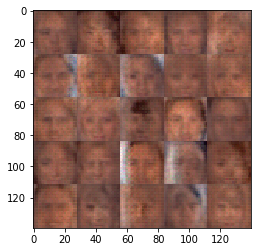

Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.7518
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.4350... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.4435... Generator Loss: 0.4845
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.5242... Generator Loss: 0.4637
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 0.5564
Epoch 1/1... Discriminator Loss: 1.4274... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.7496


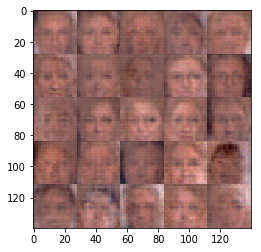

Epoch 1/1... Discriminator Loss: 1.6779... Generator Loss: 0.3653
Epoch 1/1... Discriminator Loss: 1.4352... Generator Loss: 0.5675
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.4912
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.8027
Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.5274... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.5974
Epoch 1/1... Discriminator Loss: 1.4731... Generator Loss: 0.8902
Epoch 1/1... Discriminator Loss: 1.5088... Generator Loss: 0.5287
Epoch 1/1... Discriminator Loss: 1.5277... Generator Loss: 0.4921


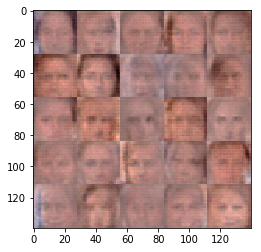

Epoch 1/1... Discriminator Loss: 1.4412... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.4969... Generator Loss: 0.4864
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.5360
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.7962
Epoch 1/1... Discriminator Loss: 1.4286... Generator Loss: 0.7409
Epoch 1/1... Discriminator Loss: 1.4741... Generator Loss: 0.5417
Epoch 1/1... Discriminator Loss: 1.5310... Generator Loss: 0.4174


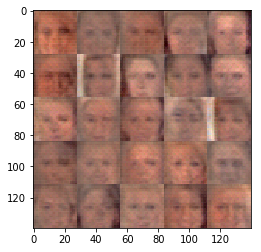

Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.5060... Generator Loss: 0.5389
Epoch 1/1... Discriminator Loss: 1.5405... Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 1.2062... Generator Loss: 0.8413
Epoch 1/1... Discriminator Loss: 1.7256... Generator Loss: 0.3871
Epoch 1/1... Discriminator Loss: 1.5945... Generator Loss: 0.5408
Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.5759
Epoch 1/1... Discriminator Loss: 1.4824... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.5137... Generator Loss: 0.5007
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.6999


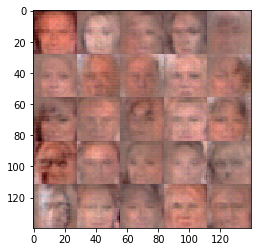

Epoch 1/1... Discriminator Loss: 1.4290... Generator Loss: 0.4677
Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.4851
Epoch 1/1... Discriminator Loss: 1.4461... Generator Loss: 0.5031
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.9029
Epoch 1/1... Discriminator Loss: 1.4812... Generator Loss: 0.6392
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.7425
Epoch 1/1... Discriminator Loss: 1.5458... Generator Loss: 0.6111
Epoch 1/1... Discriminator Loss: 1.6095... Generator Loss: 0.6132
Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.8298
Epoch 1/1... Discriminator Loss: 1.5136... Generator Loss: 0.7438


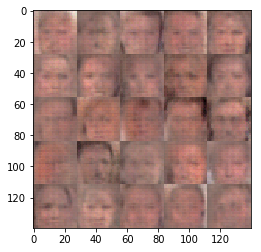

Epoch 1/1... Discriminator Loss: 1.2385... Generator Loss: 0.7755
Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.5481... Generator Loss: 0.5183
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.5545... Generator Loss: 0.6180
Epoch 1/1... Discriminator Loss: 1.5771... Generator Loss: 0.5586
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.6863... Generator Loss: 0.3706
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.5779


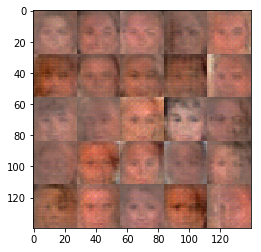

Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.6098
Epoch 1/1... Discriminator Loss: 1.3272... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 1.2852... Generator Loss: 0.6115
Epoch 1/1... Discriminator Loss: 1.5981... Generator Loss: 0.5059
Epoch 1/1... Discriminator Loss: 1.6305... Generator Loss: 0.6004
Epoch 1/1... Discriminator Loss: 1.4856... Generator Loss: 0.5731
Epoch 1/1... Discriminator Loss: 1.5922... Generator Loss: 0.3961
Epoch 1/1... Discriminator Loss: 1.5348... Generator Loss: 0.8168
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.7357


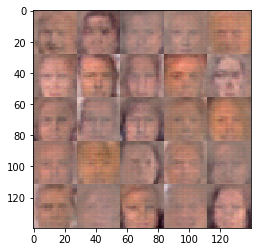

Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.5415
Epoch 1/1... Discriminator Loss: 1.4963... Generator Loss: 0.5296
Epoch 1/1... Discriminator Loss: 1.5364... Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.5447... Generator Loss: 0.6874
Epoch 1/1... Discriminator Loss: 1.3003... Generator Loss: 0.6856
Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 0.5428
Epoch 1/1... Discriminator Loss: 1.4188... Generator Loss: 0.5631
Epoch 1/1... Discriminator Loss: 1.4927... Generator Loss: 0.4765
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.5348


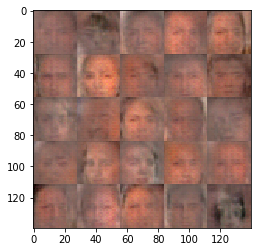

Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.5626
Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.5222
Epoch 1/1... Discriminator Loss: 1.2710... Generator Loss: 0.8242
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.6818
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.6486
Epoch 1/1... Discriminator Loss: 1.3822... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 1.5248... Generator Loss: 0.6150
Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 0.4421
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.8135
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7718


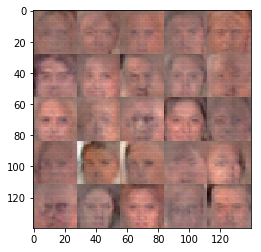

Epoch 1/1... Discriminator Loss: 1.4191... Generator Loss: 0.5430
Epoch 1/1... Discriminator Loss: 1.5681... Generator Loss: 0.4547
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.5397
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.4764
Epoch 1/1... Discriminator Loss: 1.3955... Generator Loss: 0.5265
Epoch 1/1... Discriminator Loss: 1.2430... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 0.4607
Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.6128
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 0.6937


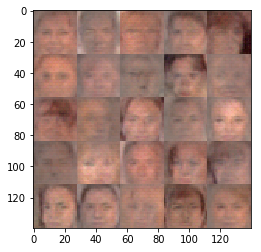

Epoch 1/1... Discriminator Loss: 1.4732... Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.6454
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.6254
Epoch 1/1... Discriminator Loss: 1.2123... Generator Loss: 0.8141
Epoch 1/1... Discriminator Loss: 1.5184... Generator Loss: 0.4606
Epoch 1/1... Discriminator Loss: 1.4129... Generator Loss: 0.5130
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 1.4413... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.4216... Generator Loss: 0.9162
Epoch 1/1... Discriminator Loss: 1.2952... Generator Loss: 0.6685


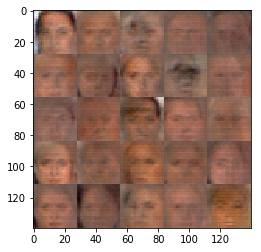

Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 0.6105
Epoch 1/1... Discriminator Loss: 1.4409... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 1.5370... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 1.5379... Generator Loss: 0.4031
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.5737
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.5805
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.5878... Generator Loss: 0.6156
Epoch 1/1... Discriminator Loss: 1.4545... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.5860


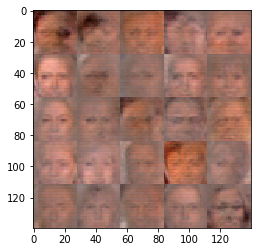

Epoch 1/1... Discriminator Loss: 1.3519... Generator Loss: 0.5392
Epoch 1/1... Discriminator Loss: 1.4971... Generator Loss: 0.4840
Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.8176
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.4458... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 1.5068... Generator Loss: 0.4718
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.5369
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 0.4673
Epoch 1/1... Discriminator Loss: 1.5127... Generator Loss: 0.5919
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.6073


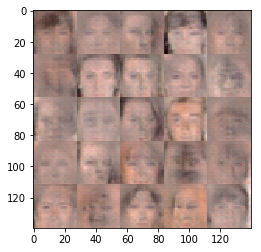

Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 1.5056... Generator Loss: 0.5109
Epoch 1/1... Discriminator Loss: 1.5746... Generator Loss: 0.6024
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.8368
Epoch 1/1... Discriminator Loss: 1.4474... Generator Loss: 0.5437
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.4906
Epoch 1/1... Discriminator Loss: 1.6727... Generator Loss: 0.3271
Epoch 1/1... Discriminator Loss: 1.4394... Generator Loss: 0.7033
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.6034


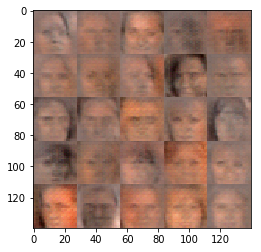

Epoch 1/1... Discriminator Loss: 1.4993... Generator Loss: 0.4898
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.5237
Epoch 1/1... Discriminator Loss: 1.4214... Generator Loss: 0.6403
Epoch 1/1... Discriminator Loss: 1.4547... Generator Loss: 0.6129
Epoch 1/1... Discriminator Loss: 1.6547... Generator Loss: 0.3298
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.6247
Epoch 1/1... Discriminator Loss: 1.3026... Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.4619... Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 1.6458... Generator Loss: 0.7407
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.5495


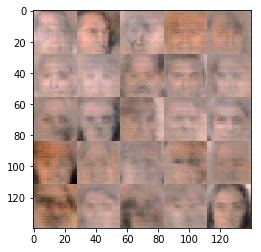

Epoch 1/1... Discriminator Loss: 1.6267... Generator Loss: 0.4355
Epoch 1/1... Discriminator Loss: 1.4894... Generator Loss: 0.4601
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.4646... Generator Loss: 0.6448
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.4813
Epoch 1/1... Discriminator Loss: 1.4613... Generator Loss: 0.4372
Epoch 1/1... Discriminator Loss: 1.5427... Generator Loss: 0.5372
Epoch 1/1... Discriminator Loss: 1.5298... Generator Loss: 0.6138
Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.5694


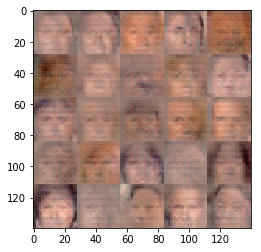

Epoch 1/1... Discriminator Loss: 1.5030... Generator Loss: 0.5344
Epoch 1/1... Discriminator Loss: 1.3468... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 1.2934... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.5908... Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.5453... Generator Loss: 0.4306
Epoch 1/1... Discriminator Loss: 1.3076... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.4498... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.4274... Generator Loss: 1.0572


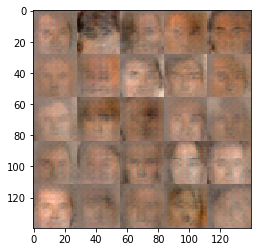

Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.6185
Epoch 1/1... Discriminator Loss: 1.5508... Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 1.4912... Generator Loss: 0.4924
Epoch 1/1... Discriminator Loss: 1.5498... Generator Loss: 0.4451
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.6716
Epoch 1/1... Discriminator Loss: 1.5527... Generator Loss: 0.3794
Epoch 1/1... Discriminator Loss: 1.6032... Generator Loss: 0.5979
Epoch 1/1... Discriminator Loss: 1.2725... Generator Loss: 0.8731
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.7583


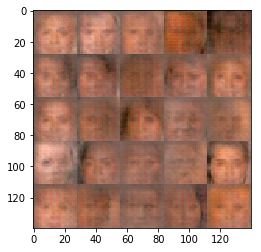

Epoch 1/1... Discriminator Loss: 1.2389... Generator Loss: 0.7555
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.5512
Epoch 1/1... Discriminator Loss: 1.4635... Generator Loss: 0.5445
Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 0.5789
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.7039
Epoch 1/1... Discriminator Loss: 1.5007... Generator Loss: 0.5008
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 0.3524
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.6388


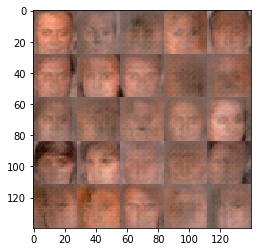

Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.5875
Epoch 1/1... Discriminator Loss: 1.6256... Generator Loss: 0.3092
Epoch 1/1... Discriminator Loss: 1.4584... Generator Loss: 0.7030
Epoch 1/1... Discriminator Loss: 1.5050... Generator Loss: 0.7088
Epoch 1/1... Discriminator Loss: 1.4891... Generator Loss: 0.7799
Epoch 1/1... Discriminator Loss: 1.4717... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 1.4600... Generator Loss: 0.5024
Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 0.6117
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.5403
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.5209


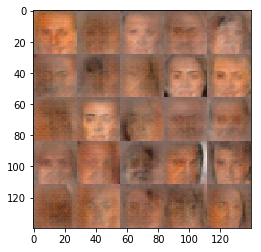

Epoch 1/1... Discriminator Loss: 1.4857... Generator Loss: 0.4394
Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.8897
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.5191
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.6245... Generator Loss: 0.3566
Epoch 1/1... Discriminator Loss: 1.4908... Generator Loss: 0.6801
Epoch 1/1... Discriminator Loss: 1.5936... Generator Loss: 0.8605
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.4283
Epoch 1/1... Discriminator Loss: 1.4676... Generator Loss: 0.6132
Epoch 1/1... Discriminator Loss: 1.3636... Generator Loss: 0.5366


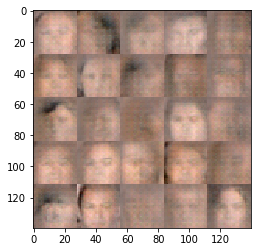

Epoch 1/1... Discriminator Loss: 1.4119... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.5779
Epoch 1/1... Discriminator Loss: 1.5197... Generator Loss: 0.4066
Epoch 1/1... Discriminator Loss: 1.5280... Generator Loss: 0.4615
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6174
Epoch 1/1... Discriminator Loss: 1.4007... Generator Loss: 0.5600
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.5163
Epoch 1/1... Discriminator Loss: 1.5266... Generator Loss: 0.3855
Epoch 1/1... Discriminator Loss: 1.5383... Generator Loss: 0.3844


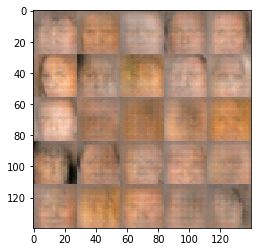

Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.4805
Epoch 1/1... Discriminator Loss: 1.5422... Generator Loss: 0.4405
Epoch 1/1... Discriminator Loss: 1.5337... Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.4860... Generator Loss: 0.7880
Epoch 1/1... Discriminator Loss: 1.5286... Generator Loss: 0.4747
Epoch 1/1... Discriminator Loss: 1.3587... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 1.4873... Generator Loss: 0.4766
Epoch 1/1... Discriminator Loss: 1.4310... Generator Loss: 0.7271


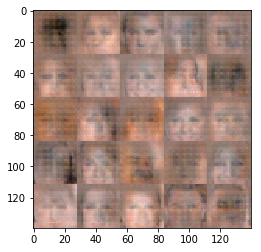

Epoch 1/1... Discriminator Loss: 1.4584... Generator Loss: 0.4472
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.8007
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 1.6686... Generator Loss: 0.4734
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 0.6090
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.5326
Epoch 1/1... Discriminator Loss: 1.4955... Generator Loss: 0.5176
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.5383
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.6406... Generator Loss: 0.5884


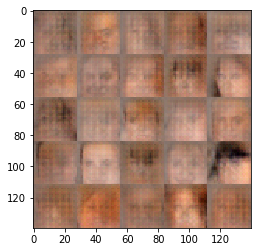

Epoch 1/1... Discriminator Loss: 1.4289... Generator Loss: 0.5672
Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.7800
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 0.4723
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.5718
Epoch 1/1... Discriminator Loss: 1.4686... Generator Loss: 0.5218
Epoch 1/1... Discriminator Loss: 1.4748... Generator Loss: 0.4230
Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.4807... Generator Loss: 0.4409
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.3979


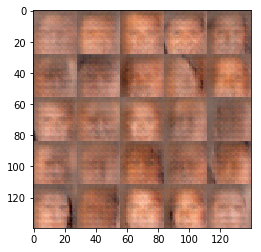

Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.7687
Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.7009
Epoch 1/1... Discriminator Loss: 1.6160... Generator Loss: 0.8915
Epoch 1/1... Discriminator Loss: 1.5475... Generator Loss: 0.4754
Epoch 1/1... Discriminator Loss: 1.5180... Generator Loss: 0.4546
Epoch 1/1... Discriminator Loss: 1.4563... Generator Loss: 0.5563
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.7752
Epoch 1/1... Discriminator Loss: 1.5472... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.4748... Generator Loss: 0.3665


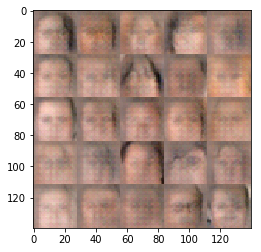

Epoch 1/1... Discriminator Loss: 1.5854... Generator Loss: 0.3505
Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.5064
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 0.8682
Epoch 1/1... Discriminator Loss: 1.5065... Generator Loss: 0.5950
Epoch 1/1... Discriminator Loss: 1.6486... Generator Loss: 0.3354


In [23]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.